In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

(200, 2)

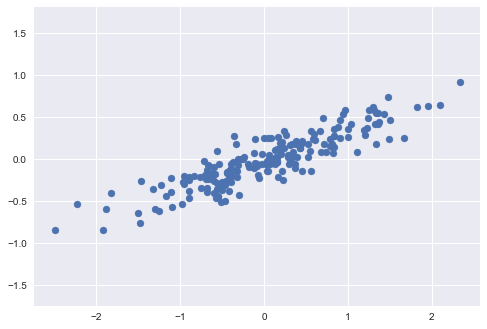

In [7]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
X.shape

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [8]:
print(pca.explained_variance_)

[ 0.75871884  0.01838551]


In [32]:
pca.mean_

array([  0.00000000e+00,   3.03839733e-01,   5.20478575e+00,
         1.18358375e+01,   1.18480801e+01,   5.78185865e+00,
         1.36227045e+00,   1.29660545e-01,   5.56483027e-03,
         1.99387869e+00,   1.03823038e+01,   1.19794101e+01,
         1.02793545e+01,   8.17584864e+00,   1.84641068e+00,
         1.07957707e-01,   2.78241514e-03,   2.60155815e+00,
         9.90317195e+00,   6.99276572e+00,   7.09794101e+00,
         7.80634391e+00,   1.78853645e+00,   5.00834725e-02,
         1.11296605e-03,   2.46967168e+00,   9.09126322e+00,
         8.82136895e+00,   9.92710072e+00,   7.55147468e+00,
         2.31775181e+00,   2.22593211e-03,   0.00000000e+00,
         2.33945465e+00,   7.66722315e+00,   9.07178631e+00,
         1.03016138e+01,   8.74401781e+00,   2.90929327e+00,
         0.00000000e+00,   8.90372844e-03,   1.58375070e+00,
         6.88146912e+00,   7.22815804e+00,   7.67223150e+00,
         8.23650529e+00,   3.45631608e+00,   2.72676683e-02,
         7.23427935e-03,

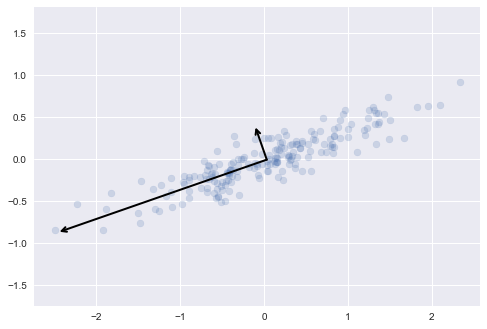

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
    linewidth=2,
    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [34]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


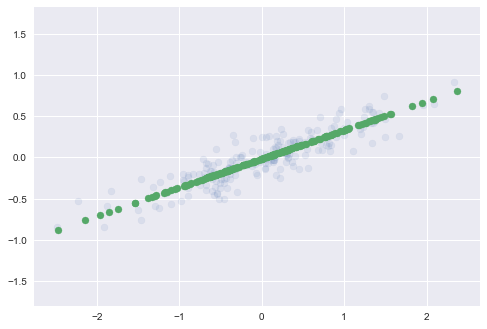

In [41]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=1)
plt.axis('equal');

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [14]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


C:\Users\Gebruiker\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


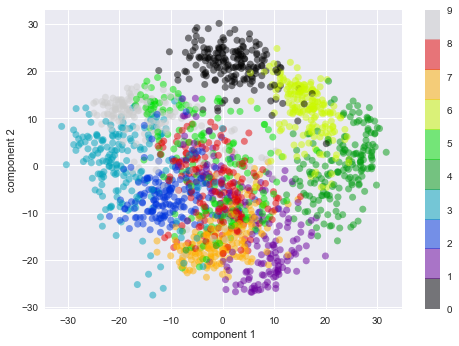

In [16]:
plt.scatter(projected[:, 0], projected[:, 1],
c=digits.target, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [24]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

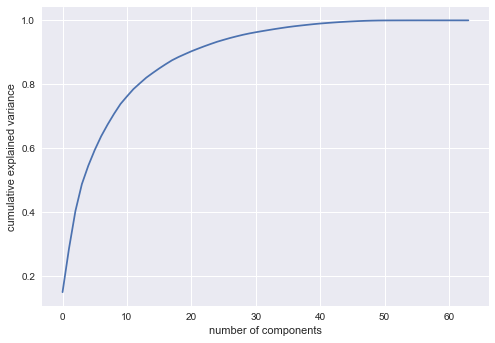

In [17]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');